In [364]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
#Read the gun violence data
gunData = pd.read_csv('Cleaned up data.csv', parse_dates= ['date'], error_bad_lines=False,  header=0) 
#gunData.dtypes
gunData.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url_fields_missing,congressional_district,gun_stolen,...,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,269702,2014-12-24,Illinois,Warsaw,245 Underwood,2,0,False,18.0,0::Unknown,...,1.0,"Man shoots, kills woman, himself.",0::30||1::37,0::Adult 18+||1::Adult 18+,0::Female||1::Male,NaN,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,47.0,94.0
1,926455,2017-09-03,Minnesota,Saint Paul,White Bear Ave,0,0,False,4.0,0::Unknown,...,1.0,Deli employee reportedly brandished gun at cus...,NaN,0::Adult 18+,NaN,NaN,0::Unharmed,0::Subject-Suspect,NaN,67.0
2,912455,2017-08-13,Minnesota,Saint Paul,Earl St and Suburban Ave,0,1,False,4.0,0::Unknown,...,1.0,~1 AM; victim shot in arm.,NaN,0::Adult 18+,0::Male,NaN,0::Injured,0::Victim,NaN,67.0
3,910806,2017-08-07,Minnesota,Saint Paul,Ames Ave E and Hazel St N,0,0,False,4.0,0::Unknown,...,1.0,11:40 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0
4,910812,2017-08-07,Minnesota,Saint Paul,653 Geranium Ave E,0,1,False,4.0,0::Unknown,...,1.0,Victim shot in hand.,0::18,0::Adult 18+,0::Male,NaN,0::Injured,0::Victim,NaN,67.0


In [365]:
print("Make new df that aggreagtes num killed and injured by year")
#Create different dataframe where data is aggregated by Year 
gunDataByYear = gunData.resample('Y', on='date').sum() #Aggregates data 
gunDataByYear.drop(gunDataByYear.columns[[0,3,4,5,6,8,9]], axis = 1, inplace = True) #drop non-agrregate data 
gunDataByYear["GunSalesByYear"] = ""
gunDataByYear.reset_index(inplace=True) 
gunDataByYear['date'] = pd.DatetimeIndex(gunDataByYear['date']).year #.floor datetime into year 
gunDataByYear.rename(columns={"date": "Year"}, inplace = True)
gunDataByYear.head()

Make new df that aggreagtes num killed and injured by year


,Year,n_killed,n_injured,n_guns_involved,GunSalesByYear
0,2013,317,979,121.0,
1,2014,12557,23002,7927.0,
2,2015,13484,26967,36849.0,
3,2016,15066,30580,53821.0,
4,2017,15511,30703,76189.0,


# Introducing the sales data

In [225]:
#Sources used: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-index-labels/#:~:targetText=Delete%20a%20Multiple%20Rows%20by%20Index%20Position%20in%20DataFrame&targetText=As%20df.,pass%20it%20to%20drop().&targetText=As%20default%20value%20of%20inPlace%20is%20false%2C%20so%20contents,dfObj%20will%20not%20be%20modified.
#Inplace required to modify the existing df 
#Transpose, drop first row, reset index, input state in [1,0]
print("Creating a function that modifies data frame into usable manner ")
def wrangleSalesData(df):
    df = df.T
    df.drop([df.index[0]], inplace = True)
    df.drop(df.columns[16:], axis = 1, inplace = True)
    df.reset_index(drop=True, inplace=True)
    df.at[0,0] = 'STATE'
    df.columns = df.iloc[0] #Makes first row of data into column headers 
    df = df[1:] #Rest of data after first row is the data 
    return df

In [366]:
print("applying the function and seeing the changes ")
#Applying the function to the sales csv files and append the total sales to a list 
#Everytime you use the equal sign, you're creating a new object - Raj Shah (2019, colorized)
tempTotal = []
sales2013 = pd.read_csv('types_by_state_cy2013.csv'); sales2013 = wrangleSalesData(sales2013); tempTotal.append(sales2013.iloc[-1,-1])
sales2014 = pd.read_csv('types_by_state_cy2014.csv'); sales2014 = wrangleSalesData(sales2014); tempTotal.append(sales2014.iloc[-1,-1])
sales2015 = pd.read_csv('types_by_state_cy2015.csv'); sales2015 = wrangleSalesData(sales2015); tempTotal.append(sales2015.iloc[-1,-1])
sales2016 = pd.read_csv('types_by_state_cy2016.csv'); sales2016 = wrangleSalesData(sales2016); tempTotal.append(sales2016.iloc[-1,-1])
sales2017 = pd.read_csv('types_by_state_cy2017.csv'); sales2017 = wrangleSalesData(sales2017); tempTotal.append(sales2017.iloc[-1,-1])
sales2018 = pd.read_csv('types_by_state_cy2018.csv'); sales2018 = wrangleSalesData(sales2018); tempTotal.append(sales2018.iloc[-1,-1])
#Adds the data to this column 
gunDataByYear["GunSalesByYear"] = tempTotal
gunDataByYear

applying the function and seeing the changes 


,Year,n_killed,n_injured,n_guns_involved,GunSalesByYear
0,2013,317,979,121.0,245749
1,2014,12557,23002,7927.0,246087
2,2015,13484,26967,36849.0,271018
3,2016,15066,30580,53821.0,289223
4,2017,15511,30703,76189.0,322078
5,2018,3533,6171,17545.0,336549


Text(0.5, 0.98, 'Gun Violence vs Gun Sales')

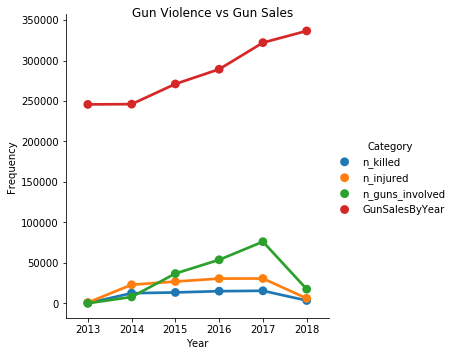

In [227]:
print("Finding any correlation with sales and violence")
#Appending the gunDataByYear data frame with the sales data 
import warnings; warnings.simplefilter('ignore') #stop the factorplot error from appearing 
import seaborn as sns
import matplotlib.pyplot as plt
#line = gunDataByYear.plot.line(x = 'date', y='n_killed')
sns_salesPlot = gunDataByYear.melt('Year', var_name='Category',  value_name='Frequency')
#Frequency was being treated as an object and needed to be a float 
sns_salesPlot['Frequency'] = pd.to_numeric(sns_salesPlot['Frequency']) 

SalesPlot = sns.factorplot(x="Year", y="Frequency", hue='Category', data=sns_salesPlot)
SalesPlot.fig.suptitle('Gun Violence vs Gun Sales')

It appears that 2013 and 2018 have incomplete data points so we will eliminate those


Text(0.5, 0.98, 'Gun Violence vs Gun Sales')

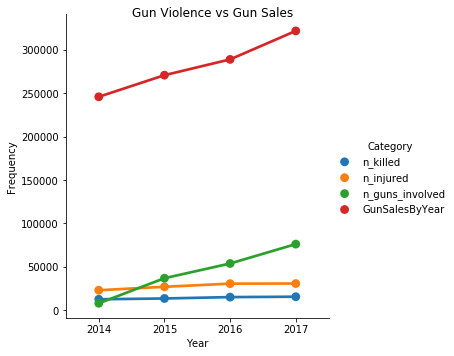

In [228]:
print("It appears that 2013 and 2018 have incomplete data points so we will eliminate those")
droppedItem = sns_salesPlot[(sns_salesPlot['Year'] == 2013) | (sns_salesPlot['Year'] == 2018)].index
sns_salesPlot.drop(droppedItem , inplace=True)
SalesPlot = sns.factorplot(x="Year", y="Frequency", hue='Category', data=sns_salesPlot)
SalesPlot.fig.suptitle('Gun Violence vs Gun Sales')

# Fatality Analysis

In [368]:
#Add a 'Year' column to our initial data set to make our lives easier. https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
gunData.insert(2, 'Year', pd.DatetimeIndex(gunData['date']).year)

In [369]:
print("Create function that adds Year Over Year change in gun deaths per state per year")
#So we don't see much of a correlation between overall gun sales and gun violence, but let's look at every state to get a better understanding 

#Add a 'Year' column to our initial data set to make our lives easier. https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
#Commented out because it already happened 
#gunData.insert(2, 'Year', pd.DatetimeIndex(gunData['date']).year)

StateYearByYear = gunData.groupby(['state', 'Year']).sum()
StateYearByYear.drop(StateYearByYear.columns[[0,2,3,4,5,6,7,8,9]], axis = 1, inplace = True)
#Groupby looks good visually, but not good for manipulation 
StateYearByYear.reset_index(inplace=True)
StateYearByYear["YoY Change"] = ""

#Logic for YoY change 
def addYoy(df):
    deltaYear = []
    tempState = ""; tempKilled = 1; tempAns = 1
    for index, row in df.iterrows():
        if row['state'] != tempState: #checks if there is a state change amongst the row 
            deltaYear.append(0) #append empty space to the list 
            tempState = row['state'] #declare new temp variables 
            tempKilled = row['n_killed']
        else: 
            if tempKilled == 0:
                tempKilled = 1
            tempAns = round(((row['n_killed'] - tempKilled)/(tempKilled)) * 100, 2) #basic percent change formula 
            deltaYear.append(tempAns)
            tempKilled = row['n_killed']      
    df["YoY Change"] = deltaYear
addYoy(StateYearByYear)
StateYearByYear.head()

print("Now that we have YoY change, let's see identify states that got the greatest increases in fatalities ")
StateYearByYear.nlargest(5, ['YoY Change'])

Create function that adds Year Over Year change in gun deaths per state per year
Now that we have YoY change, let's see identify states that got the greatest increases in fatalities 


,state,Year,n_killed,YoY Change
282,Wisconsin,2014,163,16200.00
161,Nevada,2014,150,14900.00
138,Mississippi,2014,231,11450.00
1,Alabama,2014,325,10733.33
59,Georgia,2014,522,10340.00


In [153]:
"""This is pretty odd! The top 7+ items of greatest percent change are all from 2014. 
Let's assume that this data is not complete and only use data later than 2013"""
StateYearByYear2 = StateYearByYear.copy()
droppedItem = StateYearByYear2[ StateYearByYear2['Year'] == 2013 ].index
StateYearByYear2.drop(droppedItem , inplace=True)
StateYearByYear2.reset_index(inplace=True)
StateYearByYear2.drop(StateYearByYear2.columns[[0]], axis = 1, inplace = True) #remove created index column

print("Let's rerun the function in our new dataframe and spit out the bottom 5 YoY")
addYoy(StateYearByYear2)
StateYearByYear2.nsmallest(5, ['YoY Change'])

Let's rerun the function in our new dataframe and spit out the bottom 5 YoY


,state,Year,n_killed,YoY Change
149,New Hampshire,2018,1,-95.65
134,Montana,2018,5,-87.80
59,Hawaii,2018,1,-87.50
79,Iowa,2018,10,-85.92
39,Delaware,2018,8,-85.71


In [154]:
#"Seems that 2018 data is not complete either since the bottom 10 is all referring to that year. Let's remove that too")
StateYearByYear3 = StateYearByYear.copy()
droppedItem = StateYearByYear3[(StateYearByYear3['Year'] == 2013) | (StateYearByYear3['Year'] == 2018) ].index
StateYearByYear3.drop(droppedItem , inplace=True)
StateYearByYear3.reset_index(inplace=True)
StateYearByYear3.drop(StateYearByYear3.columns[[0]], axis = 1, inplace = True) #remove created index column

print("Let's rerun the function in our new dataframe and spit out the top and bottom 10 YoY")
addYoy(StateYearByYear3)
print(StateYearByYear3.nlargest(10, ['YoY Change']))
print("-----------------------------------------------")
print(StateYearByYear3.nsmallest(10, ['YoY Change']))

Let's rerun the function in our new dataframe and spit out the top and bottom 10 YoY
             state  Year  n_killed  YoY Change
46          Hawaii  2016        34      183.33
5           Alaska  2015        70      141.38
79           Maine  2017        33       83.33
194  West Virginia  2016        99       70.69
165   South Dakota  2015        25       56.25
45          Hawaii  2015        12       50.00
93       Minnesota  2015       123       43.02
77           Maine  2015        31       40.91
201        Wyoming  2015        21       40.00
51           Idaho  2017        47       38.24
-----------------------------------------------
            state  Year  n_killed  YoY Change
47         Hawaii  2017         8      -76.47
203       Wyoming  2017         9      -50.00
78          Maine  2016        18      -41.94
183       Vermont  2017         9      -30.77
181       Vermont  2015        13      -27.78
30       Delaware  2016        42      -27.59
26    Connecticut  2016     

This colored bar represents the average YoY change, and the grey line represents the range of change through all years from 2014 - 2018


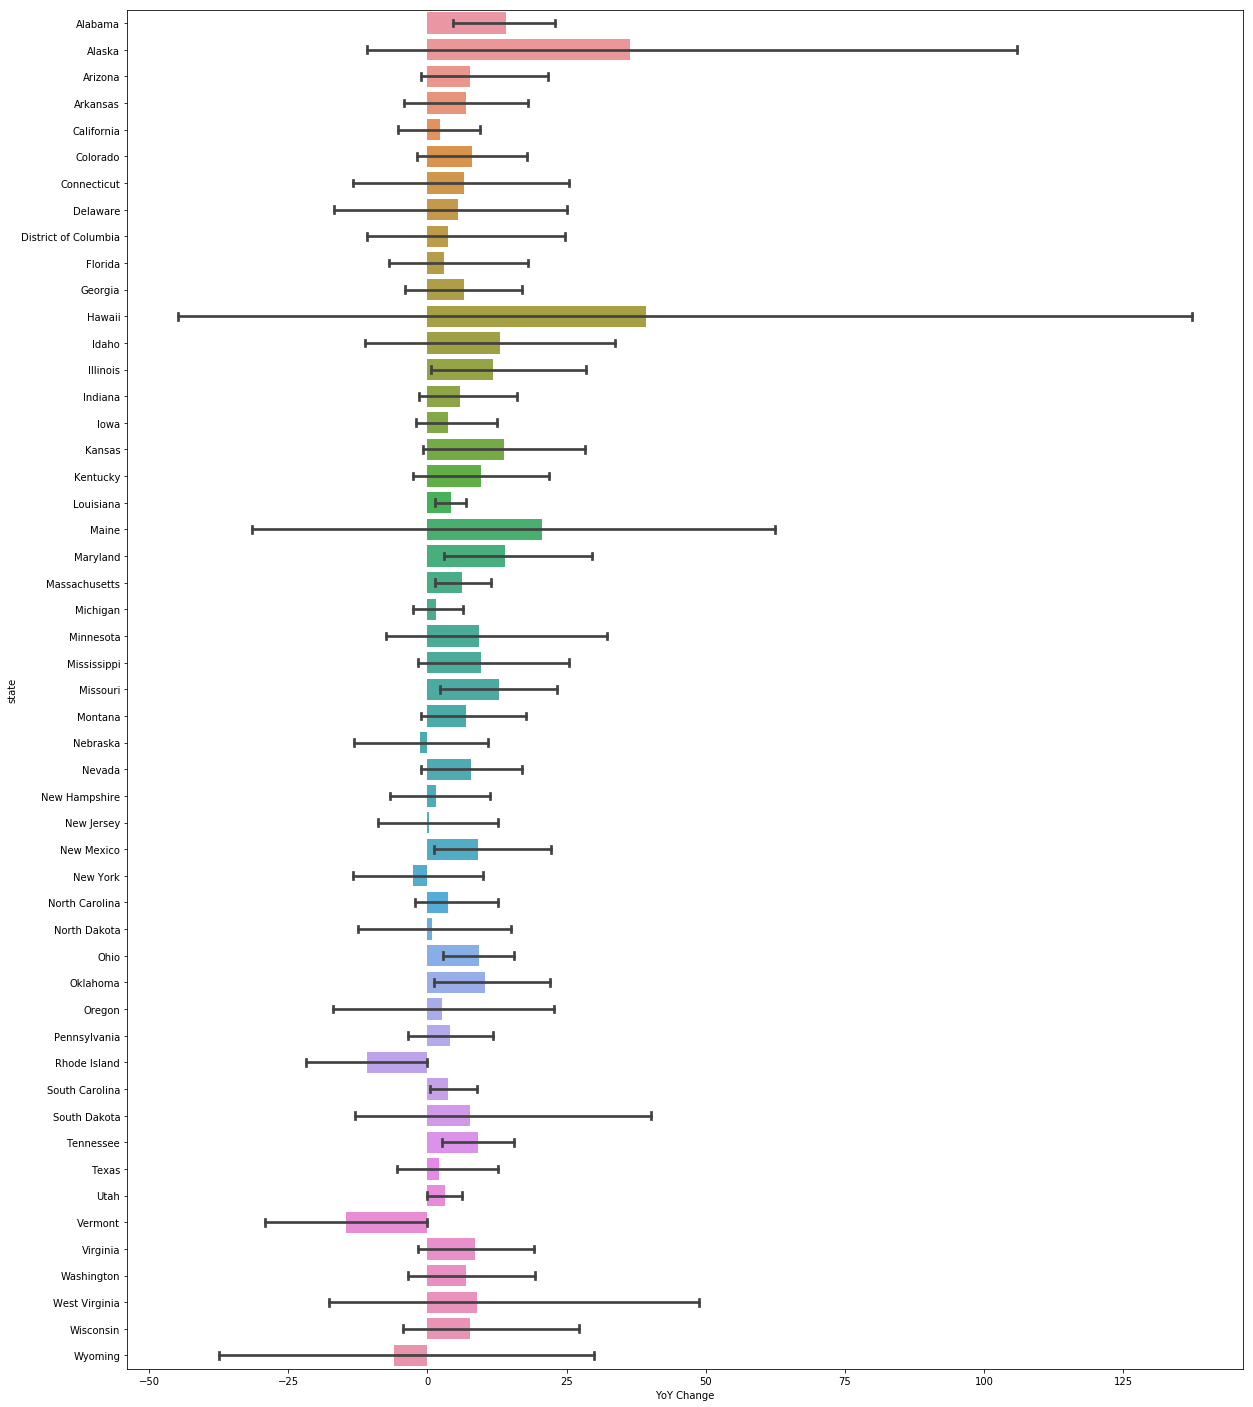

In [155]:
from matplotlib import pyplot
ax = pyplot.subplots(figsize=(20, 25))
sns.barplot(x="YoY Change", y="state", capsize = .25, data=StateYearByYear3)
print("This colored bar represents the average YoY change, and the grey line represents the \
range of change through all years from 2014 - 2018")

In [156]:
print("This tells an interesting story, but let's normalize the number killed and the state's population")
USpopulation = pd.read_csv('populationperstatedata.csv', header=0,  thousands=',')
#gunDataByYear.drop(gunDataByYear.columns[[0,3,4,5,6,8,9]], axis = 1, inplace = True) #drop non-agrregate data 
USpopulation.drop(USpopulation.columns[[1,2,3,4,5,6,-1]], axis = 1, inplace = True)
USpopulation.head()

This tells an interesting story, but let's normalize the number killed and the state's population


,Geographic Area,2014,2015,2016,2017
0,United States,318386421.0,320742673.0,323071342.0,325147121.0
1,Northeast,56015864.0,56047587.0,56058789.0,56072676.0
2,Midwest,67752238.0,67869139.0,67996917.0,68156035.0
3,South,119657737.0,121037542.0,122401186.0,123598424.0
4,West,74960582.0,75788405.0,76614450.0,77319986.0


In [157]:
print("This will wrangle the data into a long format just like the StateByYear3 structure")
USpopulation_long = USpopulation.melt('Geographic Area', var_name='Year',  value_name='Population')
USpopulation_long = USpopulation_long.groupby(['Geographic Area', 'Year']).sum()
USpopulation_long.reset_index(inplace=True)
droppedItem = USpopulation_long[(USpopulation_long['Geographic Area'] == 'Midwest') | \
                                (USpopulation_long['Geographic Area'] == 'West') | \
                                (USpopulation_long['Geographic Area'] == 'Northeast') | \
                                (USpopulation_long['Geographic Area'] == 'South') | \
                                (USpopulation_long['Geographic Area'] == 'United States')].index
USpopulation_long.drop(droppedItem , inplace=True)
USpopulation_long.reset_index(drop = True, inplace=True)

popList = []
for index, row in USpopulation_long.iterrows():
    popList.append(row['Population'])
StateYearByYear3['Population'] = popList

killedPopulationRatioList = []
for index, row in StateYearByYear3.iterrows():
    killedPopulationRatioList.append(round(row['n_killed']/row['Population'], 10))
StateYearByYear3['Pop Death Ratio'] = killedPopulationRatioList
        
def addYoyRatio(df):
    deltaYear = []
    tempState = ""; tempKilledR = 1; tempAns = 1
    for index, row in df.iterrows():
        if row['state'] != tempState: #checks if there is a state change amongst the row 
            deltaYear.append(0) #append empty space to the list 
            tempState = row['state'] #declare new temp variables 
            tempKilledR = row['Pop Death Ratio']
        else: 
            tempAns = round(((row['Pop Death Ratio'] - tempKilledR)/(tempKilledR)) * 100, 3) #basic percent change formula 
            deltaYear.append(tempAns)
            tempKilledR = row['Pop Death Ratio']      
    df["Ratio YoY Change"] = deltaYear
    
addYoyRatio(StateYearByYear3)
#StateYearByYear3.drop(StateYearByYear3.columns[-1], axis = 1, inplace = True)
StateYearByYear3.head()

This will wrangle the data into a long format just like the StateByYear3 structure


,state,Year,n_killed,YoY Change,Population,Pop Death Ratio,Ratio YoY Change
0,Alabama,2014,325,0.00,4842481.0,0.000067,0.000
1,Alabama,2015,385,18.46,4853160.0,0.000079,18.201
2,Alabama,2016,488,26.75,4864745.0,0.000100,26.451
3,Alabama,2017,544,11.48,4875120.0,0.000112,11.238
4,Alaska,2014,29,0.00,736307.0,0.000039,0.000


In [161]:
print(StateYearByYear3.nlargest(6, ['Pop Death Ratio']))
print('-------')
print(StateYearByYear3.nsmallest(6, ['Pop Death Ratio']))

                   state  Year  n_killed  YoY Change  Population  \
33  District of Columbia  2015       124       34.78    675254.0   
34  District of Columbia  2016       106      -14.52    686575.0   
35  District of Columbia  2017       100       -5.66    695691.0   
32  District of Columbia  2014        92        0.00    662513.0   
6                 Alaska  2016        88       25.71    741504.0   
75             Louisiana  2017       549        4.17   4670818.0   

    Pop Death Ratio  Ratio YoY Change  
33         0.000184            32.239  
34         0.000154           -15.926  
35         0.000144            -6.897  
32         0.000139             0.000  
6          0.000119            25.043  
75         0.000118             4.340  
-------
            state  Year  n_killed  YoY Change  Population  Pop Death Ratio  \
47         Hawaii  2017         8      -76.47   1424203.0         0.000006   
44         Hawaii  2014         8        0.00   1414862.0         0.000006   
4

In [129]:
#The most interesting state to look at here is Hawaii since it has one of the highest and lowest changes in gun fatalities 
StateYearByYear3[StateYearByYear3['state']=='Hawaii']

,state,Year,n_killed,YoY Change,Population
44,Hawaii,2014,8,0.00,1414862.0
45,Hawaii,2015,12,50.00,1422484.0
46,Hawaii,2016,34,183.33,1428105.0
47,Hawaii,2017,8,-76.47,1424203.0


# Unused Code

In [19]:
#tempData = gunData.groupby('date', as_index=False).agg({"n_injured": "sum"}) #Sums numInjured based on each day
#tempData1 = gunData.groupby(gunData.date.dt.year).agg(['n_injured']).rename(columns={'sum':'Injured Sum'}) #Provides number injured by year
#sales2013 = sales2013.drop(sales2013.row[0], axis=1) #Removes columns, not used but good to remember 
#gunData.groupby(Grouper(level='date', freq='60s', axis=1)) #alternative way of doing the resampling

# ans = []
# for i in tempTotal:
#     ans.append(i.iloc[-1,-1]) test123
# ans

#c = ["blue", "purple", "red", "green", "pink"]
# for i, g in enumerate(sns_salesPlot.groupby("Category")):
#     ax = sns.barplot(data=g[1],
#                      x="Year",
#                      y="Frequency",
#                      hue="Category",
#                      color=c[i],
#                      zorder=-i, # so first bars stay on top
#                      edgecolor="k")

In [ ]:
#Creates barplot but with only 2015 data 
# StateYearByYear2015 = StateYearByYear2.copy()
# droppedItem = StateYearByYear2015[(StateYearByYear2015['Year'] == 2014) |  (StateYearByYear2015['Year'] == 2016) | (StateYearByYear2015['Year'] == 2017) | (StateYearByYear2015['Year'] == 2018)].index
# StateYearByYear2015.drop(droppedItem , inplace=True)
# StateYearByYear2015.reset_index(inplace=True)

# #Source: https://seaborn.pydata.org/generated/seaborn.barplot.html
# from matplotlib import pyplot
# ax = pyplot.subplots(figsize=(20, 25))
# sns.barplot(x="YoY Change", y="state", data=StateYearByYear2015)

In [ ]:
#gunData machine learning 

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
from random import randrange

gunData2 = gunData.copy()
gunData2['Region'] = ""


def addRegion(row): 
    Northeast = 1; Midwest = 2; South = 3; West = 4
    if row['state'] ==('Maine') or row['state'] ==('New Hampshire') or row['state'] ==('Vermont') or \
    row['state'] ==('Massachusetts') or row['state'] ==('Rhode Island') or row['state'] ==('Connecticut') or \
    row['state'] ==('New York') or row['state'] ==('New Jersey') or row['state'] ==('Pennsylvania'):
        return Northeast
    elif row['state'] =='Ohio' or row['state'] =='Michigan' or row['state'] =='Indiana'or row['state'] =='Wisconsin' or\
    row['state'] =='Illinois' or row['state'] =='Minnesota' or row['state'] =='Iowa' or row['state'] =='Missouri' or \
    row['state'] =='North Dakota' or row['state'] =='South Dakota'or row['state'] =='Nebraska' or row['state'] =='Kansas':
        return Midwest
    elif row['state'] =='Delaware' or  row['state'] =='Maryland'or row['state'] == 'Virginia'or \
    row['state'] =='West Virginia'or  row['state'] =='Kentucky'or row['state'] =='North Carolina'or \
    row['state'] =='South Carolina' or row['state'] == 'Tennessee' or row['state'] == 'Georgia' or row['state'] == \
    row['state'] =='Florida' or row['state'] == 'Alabama' or row['state'] == 'Mississippi' or row['state'] == \
    row['state'] =='Arkansas' or row['state'] =='Louisiana' or row['state'] =='Texas' or row['state'] =='Oklahoma':
        return South
    elif row['state'] =='Montana' or row['state'] =='Idaho' or row['state'] =='Wyoming' or row['state'] =='Colorado' or\
    row['state'] =='New Mexico' or row['state'] == 'Arizona' or row['state'] == 'Utah' or row['state'] == 'Nevada' or \
    row['state'] =='California' or row['state'] == 'Oregon' or row['state'] == 'Washington' or row['state'] == 'Alaska' or \
    row['state'] =='Hawaii':
        return West
    else:
        return randrange(1,4)
gunData2['Region'] = gunData2.apply(addRegion, axis =1)
gunData2['Region'] = pd.to_numeric(gunData2['Region'], downcast='float') 

gunData2.info()          

In [ ]:
X = gunData2[['n_killed', 'n_guns_involved']]
y = gunData2['Region']
# Create training and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20)


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='ovr') #Multi-class logistic regression called here 
# C = 1 / lambda (If you want to make your model simple, this number should not be high. Performance metric.)
logreg.fit(X_train, y_train)
#logreg.intercept_
x1_max, x1_min = X_test['n_killed'].max(), X_test['n_killed'].min()

# Get range of values for the other axis
x2_max, x2_min = X_test['n_guns_involved'].max(), X_test['n_guns_involved'].min()

# Step size for axes
step = (x1_max / (x1_min + 0.00001)) / 1000000

# Create meshgrid
x1_axis, x2_axis = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))

In [ ]:
plt.subplot(1, 1, 1)

# Use the trained model to predict the classifications
# 'np.column_stack(...)' is all of the points on the grid, this means svc.predict() is assigning every possible
# value on the grid a category. This allows you to visualize the 3 category areas on the plot
output = logreg.predict(np.column_stack((x1_axis.flatten(), x2_axis.flatten())))

# Reshape to be shown on the contour plot
output = output.reshape(x1_axis.shape)

# Create the contour plot.
# Note that above, the TEST features were used to create the contours. That is, the SVM model was 
# trained with the training data, and the test data was used to predict and plot the classification regions.
plt.contourf(x1_axis, x2_axis, output, alpha = 0.75)

# Now you can plot the test data along with the actual classifications to see the accuracy of the model
# The regions are the predicted categories based on the model, and the points are the actual categories
plt.scatter(X_test['n_killed'], X_test['n_guns_involved'], 
            c=y_test, edgecolors='black')
plt.xlabel('n killed')
plt.ylabel('n_guns_involved')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('Logistic Regression Example')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
#import descartes

%matplotlib inline

geometry = [Point(xy) for xy in zip(gunData.longitude, gunData.latitude)]